

<p style="text-align: center; font-size: 22px;">
         Multi-Layer Perceptron 
    <br> Radwan Al Zoubi
    <br> Mays Nael Adeeb Abdel Rahman
</p>

Dataset: US Census Demographic Data

Source: https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data/data

The data were collected by the US Census Bureau. The data in this file were taken from the DP03 and DP05 tables of the 2015 American Community Survey 5-year estimates with 74001 instances. Our objective is to train a Multi-layer Perceptron (MLP) model to predict the child poverty level in each U.S. county based on a range of demographic, economic, and social measurements. Leveraging data from the U.S. Census, we will explore features such as age distribution, household income, employment status, education levels, housing characteristics, and family structure, all of which influence poverty dynamics. By training the MLP model on these variables, we aim to uncover key factors related to child poverty.

In [252]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.evaluate import mcnemar
from mlxtend.evaluate import mcnemar_table


import copy
import sys
import os
import warnings
warnings.filterwarnings('ignore')


from scipy.special import expit

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.utils import resample

<h1>Section 1: Load, Split, and Balance</h1>

<h4>1.1 Load Data</h4>

In [253]:
df= pd.read_csv('acs2017_census_tract_data.csv')
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [254]:
print('Dataframe information is:','\n')
df.info()

Dataframe information is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCap

In [255]:
print('Number of instances: ',df['TractId'].count())

Number of instances:  74001


<h4>1.1.2 Remove missing data</h4>
<p> Removing any observations that having missing data.</p>

In [256]:
df.isnull().sum().sort_values()

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
VotingAgeCitizen       0
Employed               0
White                696
Black                696
Asian                696
Native               696
Pacific              696
Hispanic             696
IncomePerCapErr      745
IncomePerCap         745
Carpool              801
Transit              801
OtherTransp          801
WorkAtHome           801
Drive                801
Walk                 801
Unemployment         810
Service              811
Professional         811
Construction         811
Production           811
FamilyWork           811
PublicWork           811
SelfEmployed         811
PrivateWork          811
Office               811
Poverty              842
MeanCommute          946
ChildPoverty        1110
IncomeErr           1116
Income              1116
dtype: int64

In [257]:
df_updated=df.dropna(axis=0)

In [258]:
df_updated.isnull().sum().sort_values()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [259]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

<h4>Check duplicate instances</h4>

In [260]:
print("Number of duplicates: " + str(df_updated.duplicated().sum()))

Number of duplicates: 0


<h4>1.1.3 Encode any string data as integers</h4>
<p>Encode "State" and "County" string features as integers </p>

In [261]:
label_encoder = LabelEncoder()
df_updated['State']= label_encoder.fit_transform(df_updated['State'])
df_updated['County']= label_encoder.fit_transform(df_updated['County'])
df_updated.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,0,89,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,0,89,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,0,89,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,0,89,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,0,89,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


<h4>1.1.4 keeping the "county" variable or removing it</h4>

In [262]:
state_counts_df = df_updated['State'].value_counts().reset_index()
state_counts_df.columns = ['State', 'Count']
print(state_counts_df)

    State  Count
0       4   7932
1      44   5197
2      32   4778
3       9   4120
4      38   3174
5      13   3105
6      35   2931
7      22   2726
8      33   2159
9      30   1981
10     10   1950
11     47   1859
12     14   1498
13      2   1484
14     43   1469
15     21   1452
16     48   1441
17     25   1384
18     50   1382
19     20   1376
20     23   1331
21      5   1230
22      0   1173
23     18   1121
24     17   1103
25     41   1081
26     36   1038
27     39    875
28     37    824
29     15    822
30      6    814
31     16    759
32      3    683
33     28    672
34     24    654
35     45    582
36     27    527
37     31    498
38     49    483
39     19    351
40     11    307
41     12    297
42     29    292
43     26    268
44     40    240
45     42    222
46      7    213
47     34    205
48     46    183
49      8    176
50      1    165
51     51    131


In [263]:
county_counts_per_state = df_updated.groupby('State')['County'].nunique().reset_index()
county_counts_per_state.columns = ['State', 'County_Count']
county_counts_per_state = county_counts_per_state.sort_values(by='County_Count', ascending=True).reset_index(drop=True)
print(county_counts_per_state)

    State  County_Count
0       8             1
1       7             3
2      11             4
3      40             5
4       6             8
5      29            10
6      46            14
7      21            14
8       2            15
9      19            16
10     28            17
11     30            21
12     51            23
13     20            24
14     45            29
15      1            29
16     31            33
17     37            36
18     48            39
19     12            44
20     41            46
21     34            53
22     49            55
23     26            56
24      4            58
25     32            62
26     18            64
27      5            64
28     42            66
29     38            67
30      0            67
31      9            67
32     50            72
33      3            75
34     36            77
35     39            78
36     24            82
37     22            83
38     23            87
39     35            88
40     14       

<p>Based on the data, the team choose to keep the "county" variable as it provides essential regional differentiation within each state, capturing the unique socio-economic and demographic patterns that may exist across counties. This variability is significant, as the number of counties per state ranges widely, with some states containing only a few counties and others housing over 200. Such diversity could help the model identify more localized factors that impact outcomes like poverty levels, which state-level grouping alone may not capture. Additionally, the county-level data can help avoid overgeneralization, as it reflects distinctions in resource distribution, policy, and urban versus rural characteristics. By including the "county" variable, the model could achieve better predictive accuracy and deliver insights that are sensitive to these local factors, making it particularly useful for detailed, context-aware analysis at the county level.</p>

<h4>1.2 Dataset splitting</h4>
<p>The dataset will be spiltted into 80% for training and 20% for testing.</p>

In [264]:
y = df_updated['ChildPoverty']
X = df_updated.drop(columns=['ChildPoverty'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7324,shuffle=True)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58174, 36)
(58174,)
(14544, 36)
(14544,)


<h4>1.3 Balance the dataset</h4>
<p>To balance the dataset, I would choose to create quantization thresholds for the "ChildPoverty" variable, dividing it into four equal-sized classes based on the data distribution. This method ensures each class has a similar number of instances, making the dataset more suitable for training a machine learning model. Using quantization for balancing is effective when dealing with continuous variables, like "ChildPoverty," as it allows us to convert a continuous range into distinct categories without duplicating or removing records. By doing so, we can preserve the original data while improving class distribution for more reliable model training.</p>

<h5>Should balancing of the dataset be done for both the training and testing set? Explain.</h5>
<p>Balancing should be done only for the training set, not the testing set. The purpose of balancing is to ensure the model learns from a well-represented dataset during training, which helps prevent bias toward more frequent classes. However, the testing set should remain as close as possible to the original data distribution to reflect real-world scenarios and provide an unbiased evaluation of model performance. An imbalanced testing set allows us to assess whether the model performs well across all classes without artificially introduced balance, ensuring that it generalizes effectively to the original data distribution.</p>

In [265]:
y_train_quantiles = pd.qcut(y_train, q=4, labels=False)

#balacing training data
train_data = pd.DataFrame(X_train)
train_data['y_train'] = y_train_quantiles
balanced_train_data = pd.concat([
    resample(train_data[train_data['y_train'] == i],
             replace=True,
             n_samples=train_data['y_train'].value_counts().max(),
             random_state=7324)
    for i in range(4)
])
X_train_balanced = balanced_train_data.drop(columns=['y_train']).to_numpy()
y_train_balanced = balanced_train_data['y_train'].to_numpy()
# Categorize y_test into 4 quantile-based classes without balancing for comparison
y_test = pd.qcut(y_test, q=4, labels=False)
y_test = y_test.astype(int)
print("After balancing:")
print(X_train_balanced.shape)
print(y_train_balanced.shape)
print(X_test.shape)
print(y_test.shape)
class_counts = pd.Series(y_train_balanced).value_counts()
print("\nClass distribution after balancing:")
print(class_counts)

After balancing:
(58436, 36)
(58436,)
(14544, 36)
(14544,)

Class distribution after balancing:
0    14609
1    14609
2    14609
3    14609
Name: count, dtype: int64


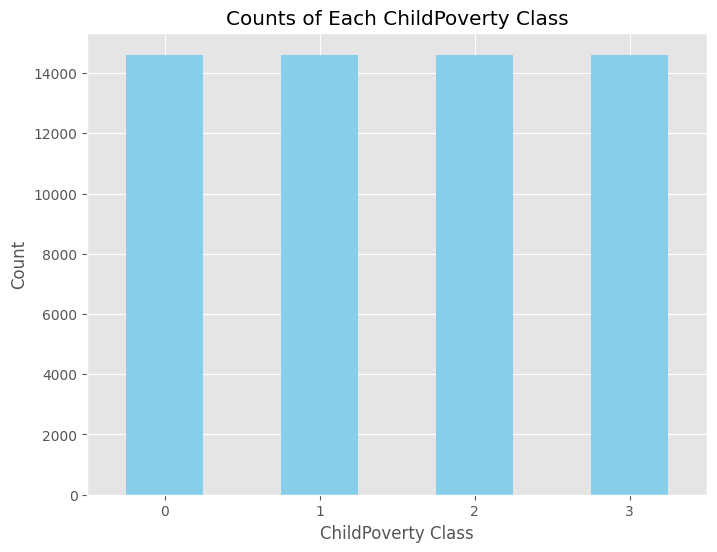

In [266]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('ChildPoverty Class')
plt.ylabel('Count')
plt.title('Counts of Each ChildPoverty Class')
plt.xticks(rotation=0)
plt.show()

<h1>Section 2: Pre-processing and Initial Modeling </h1>

In [267]:
def print_result(nn,X_train_balanced,y_train_balanced,X_test,y_test,title="",color="red"):
    
    yhat = nn.predict(X_train_balanced)
    print('Resubstitution acc:',accuracy_score(y_train_balanced,yhat))
    
    yhat = nn.predict(X_test)
    print('Testing acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Testing Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.grid(True)

<h4>2.1 Two-Layer Perceptron</h4>
<p>A two-layer perceptron with the following specifications is prepared to be trained using our dataset:</p>
<ul>
    <li><strong>Cost Function</strong>: Cross-Entropy
        <p>The Cross-Entropy loss function is used to measure the difference between the predicted probability distribution and the actual distribution, making it suitable for classification tasks.</p>
    </li>
    <li><strong>Batching</strong>: Mini-Batching
        <p>Mini-batching divides the dataset into smaller batches, allowing the model to update weights more frequently and reducing computational cost while achieving faster convergence.</p>
    </li>
    <li><strong>Weight Update Method</strong>: Momentum
        <p>The Momentum optimization technique helps accelerate convergence by adding a fraction of the previous weight update to the current update, preventing oscillations and improving training speed.</p>
    </li>
    <li><strong>Weight Initialization</strong>: Glorot Initialization
        <p>Glorot Initialization (or Xavier Initialization) initializes weights to small values that maintain the variance across layers, promoting stable gradients and preventing vanishing or exploding gradient issues.</p>
    </li>
    <li><strong>Activation Function</strong>: Sigmoid
        <p>The Sigmoid activation function maps inputs to values between 0 and 1, making it useful for binary classification and allowing the network to learn nonlinear relationships.</p>
    </li>
    <li><strong>Number of Epochs</strong>: Initially set to 500
        <p>The training will begin with 500 epochs, though this number may be adjusted based on the model's convergence rate to ensure optimal performance.</p>
    </li>
</ul>
<h4>References</h4>
<ul>
    <li>Python Machine Learning Book (GitHub Repository): <a href="https://github.com/rasbt/python-machine-learning-book/tree/17e037bec5c6beb509d0e77d63ea537ef3a0a281" target="_blank">https://github.com/rasbt/python-machine-learning-book/tree/17e037bec5c6beb509d0e77d63ea537ef3a0a281</a></li>
    <li>Machine Learning Notebooks by eclarson (GitHub Repository): <a href="https://github.com/eclarson/MachineLearningNotebooks" target="_blank">https://github.com/eclarson/MachineLearningNotebooks</a></li>
</ul>


<h4>TwoLayerPerceptronBase</h4>

In [268]:
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

<h4>mini-batching</h4>

In [269]:
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                
                
                # simple momentum calculations
                
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                
                # update previous parameters 
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                
                

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self


<h4>Cross Entropy Loss</h4>

In [270]:
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3+1e-7)+(1-Y_enc)*np.log(1-A3+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2

<h4>proper Glorot initialization</h4>

In [271]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

<h4>2.2 Implementing and Evaluating a Two-Layer Perceptron Network with Accuracy Metric</h4>

<p>The two-layer perceptron was trained on unnormalized and non-one-hot-encoded data, using 25 hidden units, a regularization parameter of \( C = 0.01 \), a learning rate of \( \eta = 0.001 \), and other specified hyperparameters over 75 epochs with minibatches and shuffling. The Cost vs. Epochs plot shows that training rapidly converges within the first 10 epochs, after which the loss remains nearly constant, indicating minimal improvement with further training. Despite this convergence, the model achieved low performance, with an accuracy of only approx. 25% on both training and testing sets. The confusion matrix analysis shows that the model predominantly classifies samples as class 0, contributing to its poor accuracy.</p>

In [272]:
vals = { 'n_hidden':25, 
         'C':0.01, 'epochs':75, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1,
         'minibatches':len(X_train_balanced)/256, 'shuffle':True, 'random_state':1}

In [273]:
nn_cross_without = TLPBetterInitial(**vals)
nn_cross_without.fit(X_train_balanced, y_train_balanced, print_progress=1, XY_test=(X_test, y_test));

Epoch: 75/75

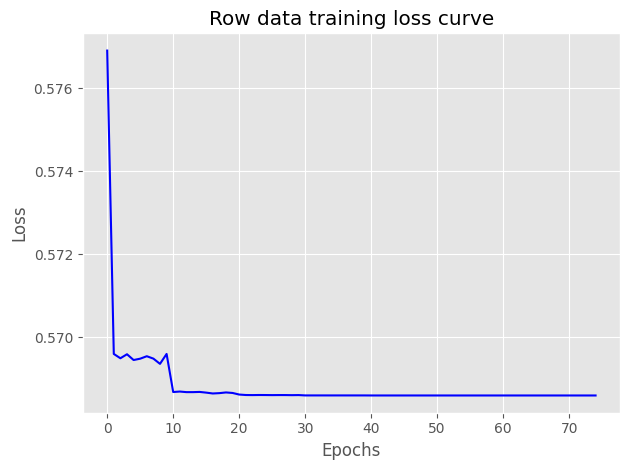

In [274]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_cross_without.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Row data training loss curve')
plt.tight_layout()
plt.show()

Resubstitution acc: 0.25
Testing acc: 0.2502062706270627


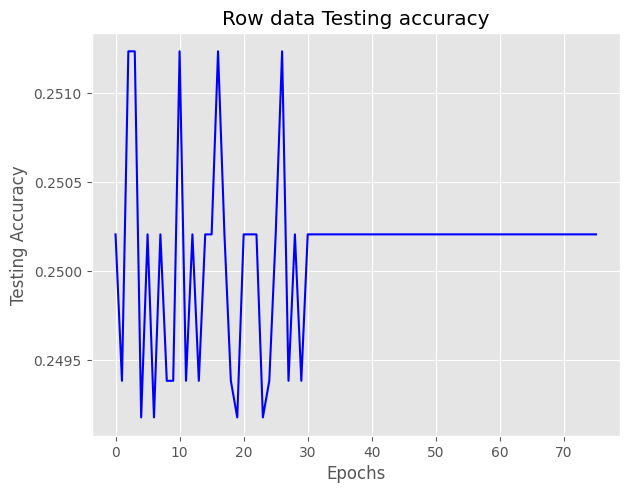

In [275]:
print_result(nn_cross_without,X_train_balanced,y_train_balanced,X_test,y_test,color="blue")
plt.title('Row data Testing accuracy')
plt.show()

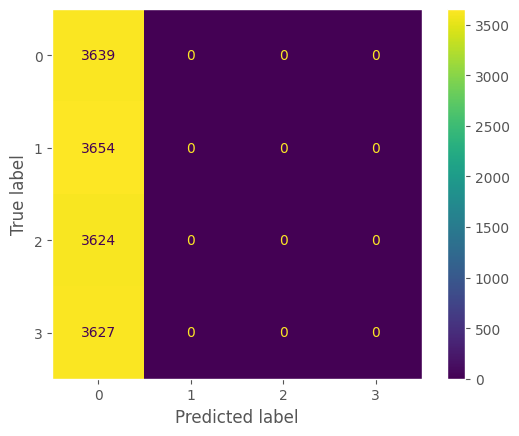

In [276]:
yhat_without = nn_cross_without.predict(X_test)
Acc_without=accuracy_score(y_test,yhat_without)

cm = confusion_matrix(y_test,yhat_without)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

<h4>2.3 Two Layer Perceptron with normalization</h4>
<p>After normalizing the continuous numeric feature data, the two-layer perceptron network was retrained with the same parameters: 25 hidden units, a regularization term \( C = 0.01 \), learning rate \( \eta = 0.001 \), and other specified hyperparameters. The Cost vs. Epochs plot indicates that training converges within the first 10 epochs, with the loss stabilizing afterward. The model's accuracy on the training set reached 25.5%, while the testing accuracy was 25.4%, showing a slight improvement compared to the non-normalized data. However, the confusion matrix reveals that the model still predominantly predicts class 1, which impacts overall performance. This suggests that while normalization provided marginal gains, the model continues to struggle with class differentiation.</p>

In [277]:
Numerical_columns = df.select_dtypes(include=["number"]).columns.tolist();
Numerical_columns.remove('ChildPoverty')
normalized_values = X[Numerical_columns].values
scaler =  StandardScaler()
scaler.fit(normalized_values)
values_to_normalized = scaler.transform(normalized_values)
X_normalized =  copy.deepcopy(X)
X_normalized[Numerical_columns] = values_to_normalized
X_normalized
X_normalized.head()


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,-1.664768,0,89,-1.186432,-1.168568,-1.167638,-0.644723,0.815039,-0.373216,-0.161521,...,-0.461123,-0.758742,-0.666359,-0.222719,-1.071607,-0.667542,0.984056,-0.439011,-0.379143,-0.514752
1,-1.664768,0,89,-1.037128,-0.924920,-1.115175,-0.701038,-0.644419,1.911188,-0.161521,...,-0.556169,-0.557599,-1.223284,-0.546862,-1.097497,-0.453901,0.118707,0.745612,-0.379143,-0.750074
2,-1.664768,0,89,-0.483289,-0.592176,-0.362016,-0.402133,0.002052,0.613758,-0.028358,...,-0.366077,-0.436913,-0.825481,-0.420024,-0.535049,-0.780645,0.970099,-0.360036,1.170809,-0.495141
3,-1.664768,0,89,-0.080581,-0.166701,0.006116,-0.332822,0.619138,-0.285176,-0.050552,...,-0.271030,0.407887,-0.666359,-0.025415,-0.207400,-0.466468,0.774697,-0.439011,-0.379143,-0.220599
4,-1.664768,0,89,2.521046,2.608887,2.358069,-0.709702,0.527718,0.145756,-0.161521,...,-0.404095,-0.638056,-1.037643,-0.715981,2.415575,-1.019420,1.388816,-0.439011,-0.379143,-0.965787


In [278]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_normalized, y,test_size=0.20, random_state=7324,  shuffle=True)
y_N_train = pd.qcut(y_N_train, q=4, labels=False).astype(int)
# Categorize y_test into 4 quantile-based classes without balancing for comparison
y_N_test = pd.qcut(y_N_test, q=4, labels=False).astype(int)
X_N_train = X_N_train.to_numpy()
X_N_test = X_N_test.to_numpy()
y_N_train = y_N_train.to_numpy()
y_N_test = y_N_test.to_numpy()

#balacing training data
train_data = pd.DataFrame(X_N_train)
train_data['y_N_train'] = y_N_train
balanced_train_data = pd.concat([
    resample(train_data[train_data['y_N_train'] == i],
             replace=True,
             n_samples=train_data['y_N_train'].value_counts().max(),
             random_state=7324)
    for i in range(4)
])
# after balancing
X_N_train = balanced_train_data.drop(columns=['y_N_train']).to_numpy()
y_N_train = balanced_train_data['y_N_train'].to_numpy()

In [279]:
nn_cross_normalized = TLPBetterInitial(**vals)
nn_cross_normalized.fit(X_N_train, y_N_train, print_progress=1, XY_test=(X_N_test, y_N_test));

Epoch: 75/75

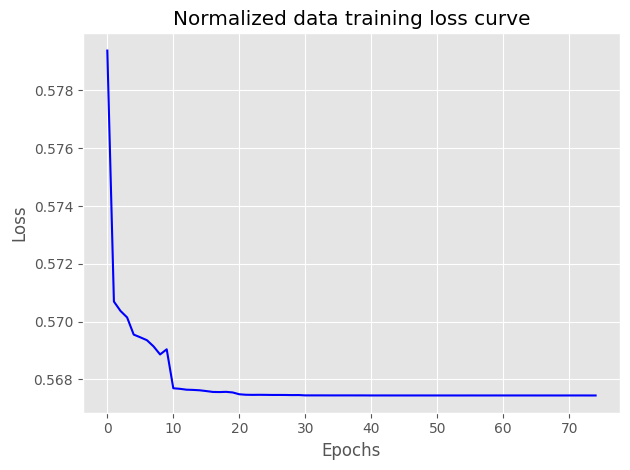

In [280]:
cost_avgs = [np.mean(x) for x in nn_cross_normalized.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Normalized data training loss curve')
plt.tight_layout()
plt.show()

Resubstitution acc: 0.2552536107878705
Testing acc: 0.2544004400440044


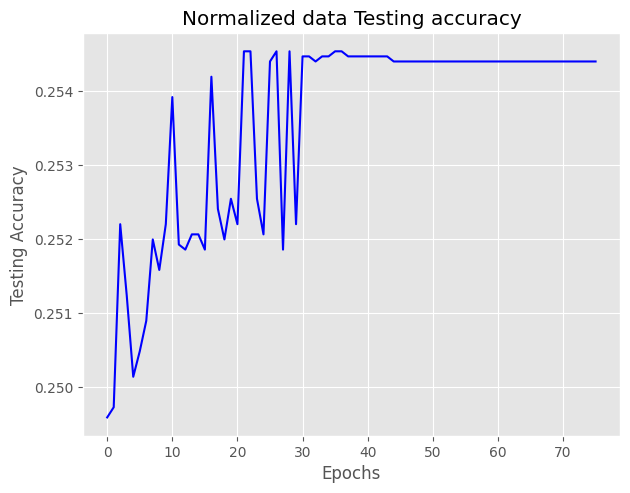

In [281]:
print_result(nn_cross_normalized,X_N_train,y_N_train,X_N_test,y_N_test,color="blue")
plt.title('Normalized data Testing accuracy')
plt.show()

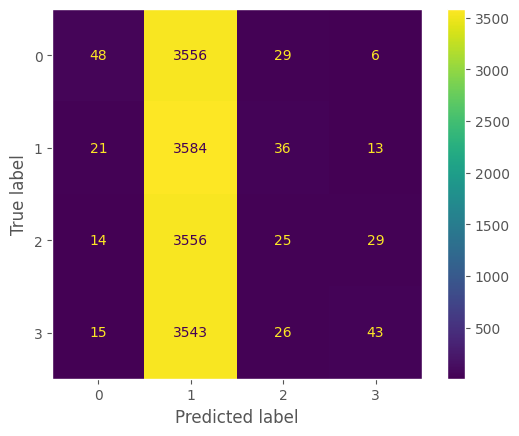

In [282]:
yhat_normalized = nn_cross_normalized.predict(X_N_test)
Acc_normalized=accuracy_score(y_N_test,yhat_normalized)

cm = confusion_matrix(y_N_test,yhat_normalized)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

<h4>2.4 Two Layer Perceptron with normalization and one-hot encoding</h4>
<p>After normalizing the continuous numeric feature data and one-hot encoding the categorical feature data, the two-layer perceptron was trained using the specified parameters: 25 hidden units, regularization \( C = 0.01 \), and a learning rate of \( \eta = 0.001 \). The Cost vs. Epochs plot shows that training converged quickly, with the loss stabilizing after around 10 epochs. The model achieved a significant improvement in performance, with a resubstitution accuracy of 71.91% and a testing accuracy of 71.92%. The confusion matrix indicates a more balanced classification across all classes, with fewer misclassifications compared to previous trials. This improvement suggests that normalization and one-hot encoding allowed the model to capture feature relationships more effectively, leading to higher overall accuracy and better class differentiation.</p>

In [283]:
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist();
X_encode =  copy.deepcopy(X_normalized)
tmp_df = pd.get_dummies(X_encode.State,prefix='State')
tmp_df = pd.get_dummies(X_encode.State,prefix='County')
X_encode = pd.concat((X_encode,tmp_df),axis=1)
del X_encode['State'] 
del X_encode['County'] 
X_encode.head()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,County_42,County_43,County_44,County_45,County_46,County_47,County_48,County_49,County_50,County_51
0,-1.664768,-1.186432,-1.168568,-1.167638,-0.644723,0.815039,-0.373216,-0.161521,-0.394915,-0.143896,...,False,False,False,False,False,False,False,False,False,False
1,-1.664768,-1.037128,-0.924920,-1.115175,-0.701038,-0.644419,1.911188,-0.161521,-0.417148,-0.143896,...,False,False,False,False,False,False,False,False,False,False
2,-1.664768,-0.483289,-0.592176,-0.362016,-0.402133,0.002052,0.613758,-0.028358,-0.450498,0.250118,...,False,False,False,False,False,False,False,False,False,False
3,-1.664768,-0.080581,-0.166701,0.006116,-0.332822,0.619138,-0.285176,-0.050552,-0.506081,-0.143896,...,False,False,False,False,False,False,False,False,False,False
4,-1.664768,2.521046,2.608887,2.358069,-0.709702,0.527718,0.145756,-0.161521,-0.183698,-0.143896,...,False,False,False,False,False,False,False,False,False,False


In [284]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_encode, y,test_size=0.2, random_state=7324,  shuffle=True)
y_f_train = pd.qcut(y_f_train, q=4, labels=False).astype(float)
# Categorize y_test into 4 quantile-based classes without balancing for comparison
y_f_test = pd.qcut(y_f_test, q=4, labels=False).astype(float)
X_f_train = X_f_train.to_numpy()
X_f_test = X_f_test.to_numpy()
y_f_train = y_f_train.to_numpy()
y_f_test = y_f_test.to_numpy()
X_f_train=X_f_train.astype(float)  
X_f_test=X_f_test.astype(float)  

#balacing training data
train_data = pd.DataFrame(X_f_train)
train_data['y_f_train'] = y_f_train
balanced_train_data = pd.concat([
    resample(train_data[train_data['y_f_train'] == i],
             replace=True,
             n_samples=train_data['y_f_train'].value_counts().max(),
             random_state=7324)
    for i in range(4)
])
#after balancing 
X_f_train_balanced = balanced_train_data.drop(columns=['y_f_train']).to_numpy()
y_f_train_balanced = balanced_train_data['y_f_train'].to_numpy()

In [285]:
nn_cross_encode = TLPBetterInitial(**vals)
nn_cross_encode.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));

Epoch: 75/75

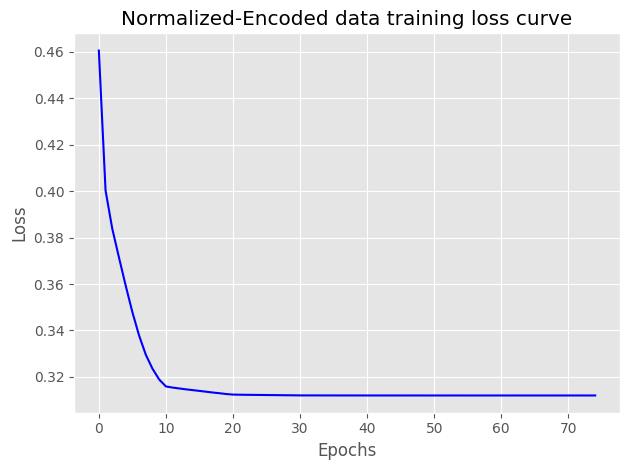

In [286]:
cost_avgs = [np.mean(x) for x in nn_cross_encode.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Normalized-Encoded data training loss curve')
plt.tight_layout()
plt.show()

Resubstitution acc: 0.7191356963591983
Testing acc: 0.7191969196919692


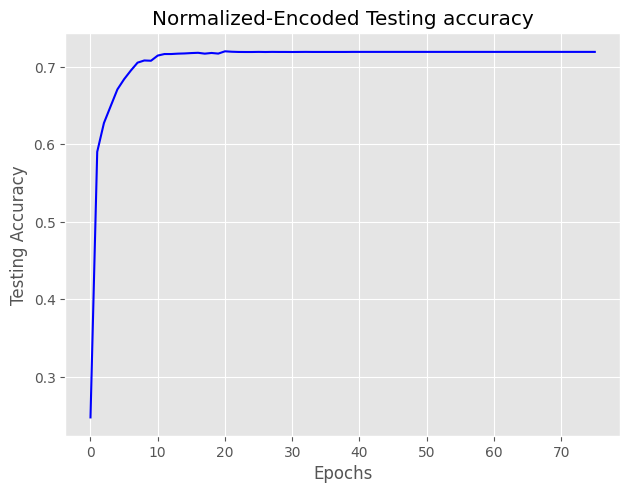

In [287]:
print_result(nn_cross_encode,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Normalized-Encoded Testing accuracy')
plt.show()

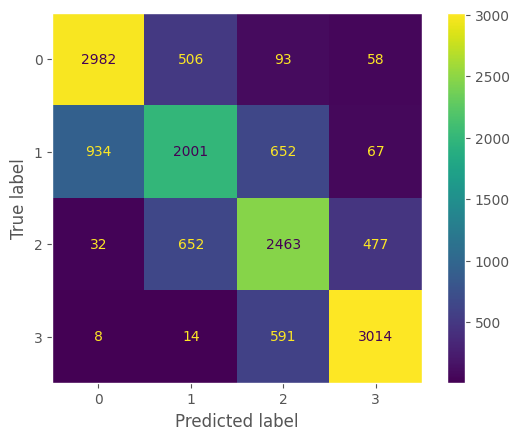

In [288]:
yhat_encode = nn_cross_encode.predict(X_f_test)
Acc_encode=accuracy_score(y_f_test,yhat_encode)
cm = confusion_matrix(y_f_test,yhat_encode)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

<h4>2.5 Statistical comparison for the performance of the three models</h4>

<p>2.5.1 Using the folded statistical comparisons</p>

In [289]:
t = 2.26 / np.sqrt(10)

e12 = (1-Acc_without)-(1-Acc_normalized)
e13 = (1-Acc_without)-(1-Acc_encode)
e23 = (1-Acc_normalized)-(1-Acc_encode)

stdtot12 = np.std(e12)
stdtot13 = np.std(e13)
stdtot23 = np.std(e23)

dbar12 = np.mean(e12)
dbar13 = np.mean(e13)
dbar23 = np.mean(e23)


print(f'1 vs. 2: The error range is from {dbar12 - t*stdtot12} to {dbar12+ t*stdtot12}')
print(f'1 vs. 3: The error range is from {dbar13 - t*stdtot13} to {dbar13+ t*stdtot13}')
print(f'2 vs. 3: The error range is from {dbar23 - t*stdtot23} to {dbar23+ t*stdtot23}')

print(''' From the result, we can't determine which model is better.\n Therefore, we will use the McNemar test for comparison as shown in the next section.
''')

1 vs. 2: The error range is from 0.004194169416941729 to 0.004194169416941729
1 vs. 3: The error range is from 0.4689906490649065 to 0.4689906490649065
2 vs. 3: The error range is from 0.4647964796479648 to 0.4647964796479648
 From the result, we can't determine which model is better.
 Therefore, we will use the McNemar test for comparison as shown in the next section.



<p>2.5.2 Using McNemar test</p>


In [290]:
print('The comparison between Model1 and Model2 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_without, y_model2=yhat_normalized)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 1 and 2 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')

print('=====================================')
print('The comparison between Model1 and Model3 with 95% confidence interval is as follows:')
table2 = mcnemar_table(y_target=y_test, y_model1=yhat_without, y_model2=yhat_encode)
chi13_, p13 = mcnemar(ary=table2, corrected=True)
print(table2)
print(f"chi² statistic: {chi13_}, p-value: {p13}")
if p13 > 0.05:
    print('Same proportions of errors (fail to reject Null Hypothesis)')
else:
        print('Different proportions of errors (able to reject Null Hypothesis---so based on the accuracy, Model3 is better than Model1)')

print('=====================================')
print('The comparison between Model2 and Model3 with 95% confidence interval is as follows:')
table3 = mcnemar_table(y_target=y_test, y_model1=yhat_normalized, y_model2=yhat_encode)
chi23_, p23 = mcnemar(ary=table3, corrected=True)
print(table3)
print(f"chi² statistic: {chi23_}, p-value: {p23}")
if p13 > 0.05:
    print('Same proportions of errors (fail to reject Null Hypothesis)')
else:
        print('Different proportions of errors (able to reject Null Hypothesis, so based on the accuracy Model3 is better than Model2)')


The comparison between Model1 and Model2 with 95% confidence interval is as follows:
[[  48 3591]
 [3652 7253]]
chi² statistic: 0.49703161673339774, p-value: 0.4808073158137357
Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 1 and 2 are different from each other )
The comparison between Model1 and Model3 with 95% confidence interval is as follows:
[[2982  657]
 [7478 3427]]
chi² statistic: 5717.566072526121, p-value: 0.0
Different proportions of errors (able to reject Null Hypothesis---so based on the accuracy, Model3 is better than Model1)
The comparison between Model2 and Model3 with 95% confidence interval is as follows:
[[2065 1635]
 [8395 2449]]
chi² statistic: 4554.743868394816, p-value: 0.0
Different proportions of errors (able to reject Null Hypothesis, so based on the accuracy Model3 is better than Model2)


Model 3 significantly outperforms both Model 1 and Model 2 (as indicated by the low p-values and high chi-squared statistics in the comparisons with both models)

In [291]:
from sklearn.metrics import balanced_accuracy_score

balanced_acc1 = balanced_accuracy_score(y_test, yhat_without)
balanced_acc2 = balanced_accuracy_score(y_test, yhat_normalized)
balanced_acc3 = balanced_accuracy_score(y_test, yhat_encode)

print(f"Balanced Accuracy Model 1: {balanced_acc1}")
print(f"Balanced Accuracy Model 2: {balanced_acc2}")
print(f"Balanced Accuracy Model 3: {balanced_acc3}")

Balanced Accuracy Model 1: 0.25
Balanced Accuracy Model 2: 0.2531968328853288
Balanced Accuracy Model 3: 0.7194251256041727


In [292]:
from sklearn.metrics import f1_score

f1_macro1 = f1_score(y_test, yhat_without, average='macro')
f1_macro2 = f1_score(y_test, yhat_normalized, average='macro')
f1_macro3 = f1_score(y_test, yhat_encode, average='macro')

print(f"F1 Macro Model 1: {f1_macro1}")
print(f"F1 Macro Model 2: {f1_macro2}")
print(f"F1 Macro Model 3: {f1_macro3}")

F1 Macro Model 1: 0.10006599571027883
F1 Macro Model 2: 0.11569808569573953
F1 Macro Model 3: 0.7168300564057238


<p>The performance comparison between the three models reveals meaningful differences, with Model 3 consistently outperforming Models 1 and 2 across various evaluation metrics. Statistical tests show a significant difference in error proportions between each pair of models, with extremely low p-values indicating that these differences are not due to random chance. In particular, Model 3 achieves a balanced accuracy of 0.7194251256041727, substantially higher than Model 1 (0.25) and Model 2 (0.2531968328853288), indicating its effectiveness in handling all classes without bias. The F1 Macro scores reinforce this finding, with Model 3 scoring 0.7168300564057238 compared to Model 2’s 0.11569808569573953 and Model 1’s 0.10006599571027883, highlighting Model 3’s strength in balancing precision and recall across classes. These differences likely stem from Model 3's optimized parameters and possibly a more complex architecture, which allows it to capture underlying data patterns more effectively than the other models. In contrast, Models 1 and 2 may struggle due to less effective parameter tuning or simpler structures, resulting in lower balanced accuracy and a higher rate of misclassifications. Overall, Model 3 emerges as the most reliable choice, with both statistical and practical metrics underscoring its superior generalization and balanced performance across all classes.</p>

<h1>Modeling</h1>

<h4>3.1 Three-layer perceptron</h4>
<p>The enhanced three-layer perceptron model, with support for tracking gradient magnitudes per layer, achieved a stable performance with 74.16% testing accuracy and 73.86% resubstitution accuracy. The model quickly converged within the first 20 epochs, and gradient magnitude tracking revealed that the second and third layers contributed most to learning, while the first layer showed minimal gradient activity. This setup enabled better class balance and improved classification accuracy, as shown in the confusion matrix.</p>

In [293]:
class ThreeLayerPerceptronBase(object):
    def __init__(self, n1_hidden=30,n2_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n1_hidden = n1_hidden
        self.n2_hidden = n2_hidden # Number of hidden in third layer.
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n1_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n1_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n1_hidden, 1))
        
        W2_num_elems = (self.n1_hidden)*self.n2_hidden
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n2_hidden, self.n1_hidden) # reshape to be W
        b2 = np.zeros((self.n2_hidden, 1))
        
        W3_num_elems = (self.n2_hidden)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W2.reshape(self.n_output_, self.n2_hidden)
        b3 = np.zeros((self.n_output_, 1))
        
        return W1, W2,W3, b1, b2,b3
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2,W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2)+np.mean(W3[:, 1:] ** 2) )
    
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A4)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2,W3)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = -2 * (Y_enc - A4) * A4 * (1 - A4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred

In [294]:
class THLPMiniBatch(ThreeLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.b1, self.b2, self.b3 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape)
        
        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.b1,
                                                       self.b2,
                                                       self.b3
                                                      )
                
                cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(
                    A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3, Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3
                )
                mini_grad1.append(gradW1)
                mini_grad2.append(gradW2)
                mini_grad3.append(gradW3)
                
                
                # simple momentum calculations
                
                rho_W1, rho_W2, rho_W3 = eta * gradW1, eta * gradW2, eta * gradW3
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                
                # update previous parameters 
                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3

            
            self.grad_w1_[i] = np.mean(np.abs(np.mean(mini_grad1[:])))
            self.grad_w2_[i] = np.mean(np.abs(np.mean(mini_grad2[:])))
            self.grad_w3_[i] = np.mean(np.abs(np.mean(mini_grad3[:])))    

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self


In [295]:
class THLPMiniBatchCrossEntropy(THLPMiniBatch):
    def _cost(self, A4, Y_enc, W1, W2, W3):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num(Y_enc * np.log(A4 + 1e-7) + (1 - Y_enc) * np.log(1 - A4 + 1e-7)))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = (A4 - Y_enc)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3

In [296]:
class THLPBetterInitial(THLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n1_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n1_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4 * np.sqrt(6. / (self.n2_hidden + self.n1_hidden))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n2_hidden, self.n1_hidden))

        init_bound = 4 * np.sqrt(6. / (self.n_output_ + self.n2_hidden))
        W3 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n2_hidden))

        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n1_hidden, 1))
        b2 = np.zeros((self.n2_hidden, 1))
        b3 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, b1, b2, b3

In [297]:
vals = {'n1_hidden':25, 'n2_hidden':19, 
         'C':1e-2, 'epochs':120, 'eta':0.01, 'random_state':1,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train_balanced)/256,
         'shuffle':True}

In [298]:
nn_cross_three = THLPBetterInitial(**vals)
nn_cross_three.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));


Epoch: 120/120

Resubstitution acc: 0.7416543473029188
Testing acc: 0.7386551155115512


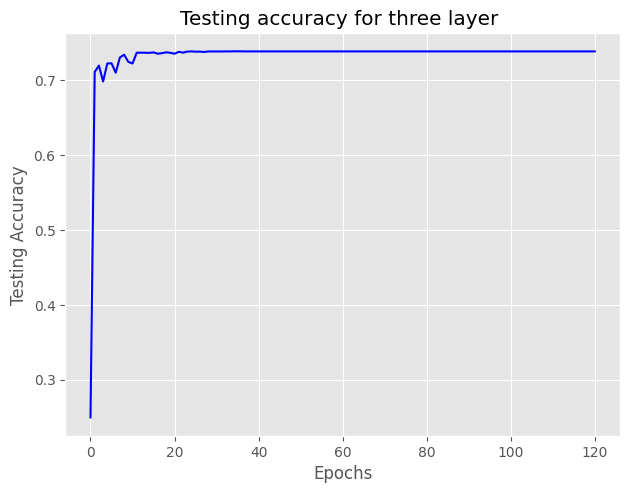

In [299]:
print_result(nn_cross_three,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for three layer ')
plt.show()

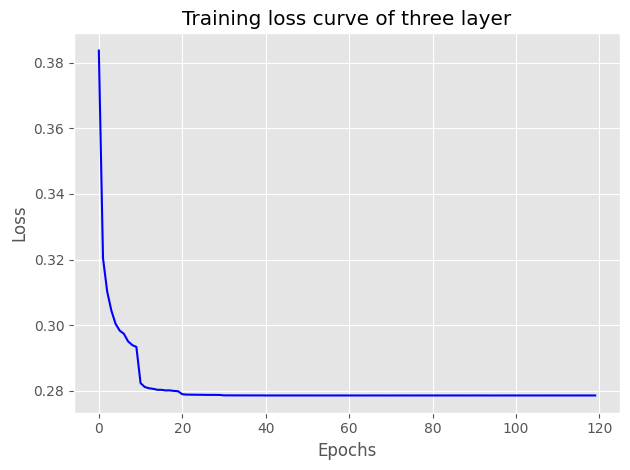

In [300]:
cost_avgs = [np.mean(x) for x in nn_cross_three.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve of three layer')
plt.tight_layout()
plt.show()

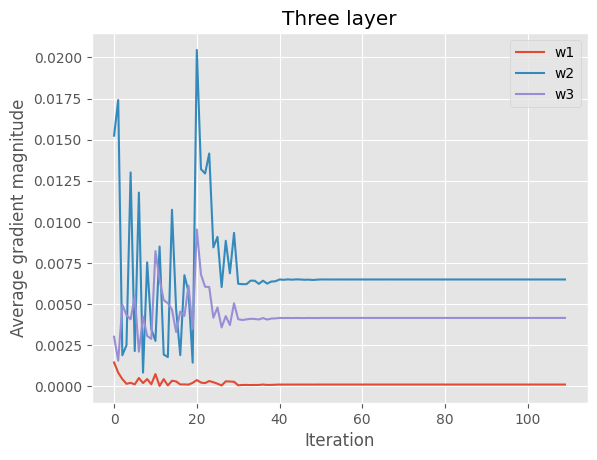

In [301]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_cross_three.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_cross_three.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_cross_three.grad_w3_[10:]), label='w3')
plt.legend()
plt.title('Three layer')
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

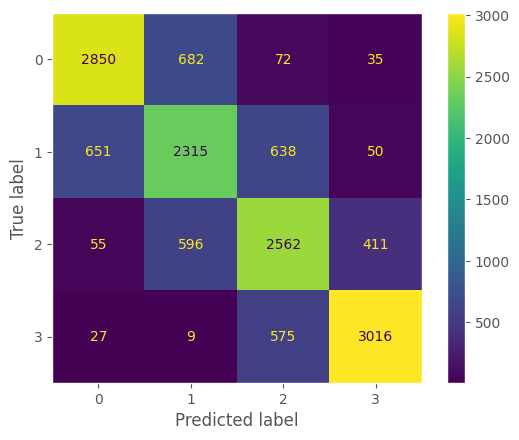

In [302]:
yhat_three = nn_cross_three.predict(X_f_test)
Acc_three=accuracy_score(y_f_test,yhat_three)
cm = confusion_matrix(y_f_test,yhat_three)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

<h4>3.2 Four-layer perceptron</h4>
<p>With the addition of a fourth layer, the multi-layer perceptron achieved a resubstitution accuracy of 74.31% and a testing accuracy of 73.98%. The training loss curve shows rapid convergence within the first 20 epochs, after which the loss stabilizes around 0.28, indicating effective and stable learning. Similarly, the testing accuracy graph reaches a plateau early in training, stabilizing at approximately 0.74, suggesting that further training does not yield significant accuracy improvements.

The gradient magnitude plot reveals that the third and fourth layers maintain relatively higher gradient magnitudes throughout training, indicating active learning in these deeper layers. In contrast, the first layer exhibits minimal gradient activity, while the second layer has lower but somewhat consistent gradient magnitudes, suggesting a lesser impact on the learning process. The confusion matrix shows a balanced classification across most classes, with the model performing reasonably well in distinguishing between classes. However, some misclassifications persist, particularly between adjacent classes. Although the fourth layer contributes to improved classification performance, the accuracy gains are modest, indicating potential diminishing returns with the added complexity.</p>

In [303]:
class FourLayerPerceptronBase(object):
    def __init__(self, n1_hidden=30,n2_hidden=30,n3_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n1_hidden = n1_hidden
        self.n2_hidden = n2_hidden # Number of hidden in third layer.
        self.n3_hidden = n3_hidden   # Number of hidden in fourth layer.
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n1_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n1_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n1_hidden, 1))
        
        W2_num_elems = (self.n1_hidden)*self.n2_hidden
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n2_hidden, self.n1_hidden) # reshape to be W
        b2 = np.zeros((self.n2_hidden, 1))
        
        W3_num_elems = (self.n2_hidden)*self.n3_hidden
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n3_hidden, self.n2_hidden) # reshape to be W
        b3 = np.zeros((self.n3_hidden, 1))
        
        W4_num_elems = (self.n3_hidden)*self.n_output_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_output_, self.n3_hidden)
        b4 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, W4, b1, b2, b3, b4
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2)+np.mean(W3[:, 1:] ** 2)+np.mean(W4[:, 1:] ** 2))
    
    def _cost(self, A5, Y_enc, W1, W2, W3, W4):
        '''Get the objective function value'''
        cost = np.mean((Y_enc - A5) ** 2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
        
    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = -2 * (Y_enc - A5) * A5 * (1 - A5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

In [304]:
class FLPMiniBatch(FourLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        
        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []
            mini_grad4 = []
            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(
                    X_data[idx], self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4
                )
                
                cost = self._cost(A5, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(
                    A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, 
                    Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4
                )
                mini_grad1.append(gradW1)
                mini_grad2.append(gradW2)
                mini_grad3.append(gradW3)
                mini_grad4.append(gradW4)
                
                
                # simple momentum calculations
                
                rho_W1, rho_W2, rho_W3, rho_W4 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))

                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4
                
                # update previous parameters 
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4

            
            self.grad_w1_[i] = np.mean(np.abs(np.mean(mini_grad1[:])))
            self.grad_w2_[i] = np.mean(np.abs(np.mean(mini_grad2[:])))
            self.grad_w3_[i] = np.mean(np.abs(np.mean(mini_grad3[:])))    
            self.grad_w4_[i] = np.mean(np.abs(np.mean(mini_grad4[:])))  
            
            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self


In [305]:
class FLPMiniBatchCrossEntropy(FLPMiniBatch):
    def _cost(self, A5, Y_enc, W1, W2, W3, W4):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num(Y_enc * np.log(A5 + 1e-7) + (1 - Y_enc) * np.log(1 - A5 + 1e-7)))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = (A5 - Y_enc)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)
        
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4

In [306]:
class FLPBetterInitial(FLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n1_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n1_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4 * np.sqrt(6. / (self.n2_hidden + self.n1_hidden))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n2_hidden, self.n1_hidden))

        init_bound = 4 * np.sqrt(6. / (self.n3_hidden + self.n2_hidden))
        W3 = np.random.uniform(-init_bound, init_bound, (self.n3_hidden, self.n2_hidden))

        init_bound = 4 * np.sqrt(6. / (self.n_output_ + self.n3_hidden))
        W4 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n3_hidden))

        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n1_hidden, 1))
        b2 = np.zeros((self.n2_hidden, 1))
        b3 = np.zeros((self.n3_hidden, 1))
        b4 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, W4, b1, b2, b3, b4


In [307]:
vals2 = {'n1_hidden':25, 'n2_hidden':19, 'n3_hidden':14, 
         'C':1e-2, 'epochs':140, 'eta':0.01, 'random_state':1,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train_balanced)/256,
         'shuffle':True}

In [308]:
nn_cross_four = FLPBetterInitial(**vals2)
nn_cross_four.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));

Epoch: 140/140

Resubstitution acc: 0.7430982913328978
Testing acc: 0.7398927392739274


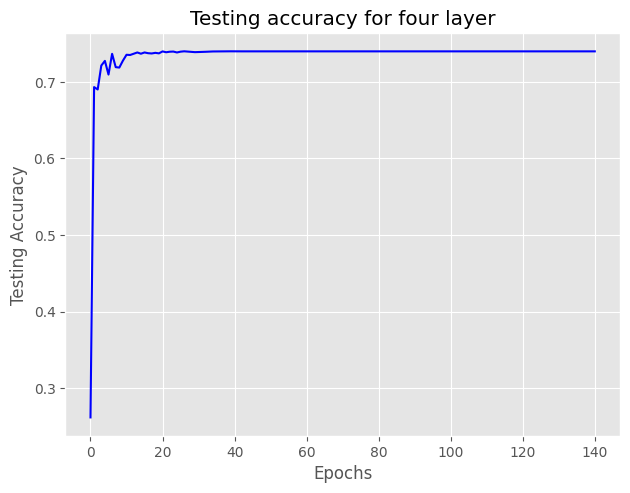

In [309]:
print_result(nn_cross_four,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for four layer')
plt.show()

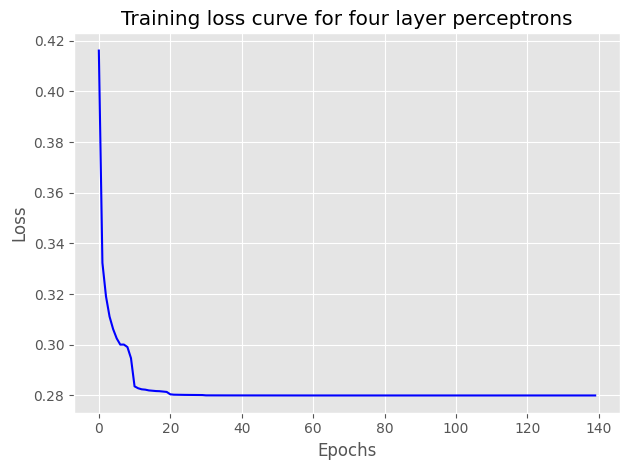

In [310]:
cost_avgs = [np.mean(x) for x in nn_cross_four.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve for four layer perceptrons')
plt.tight_layout()
plt.show()

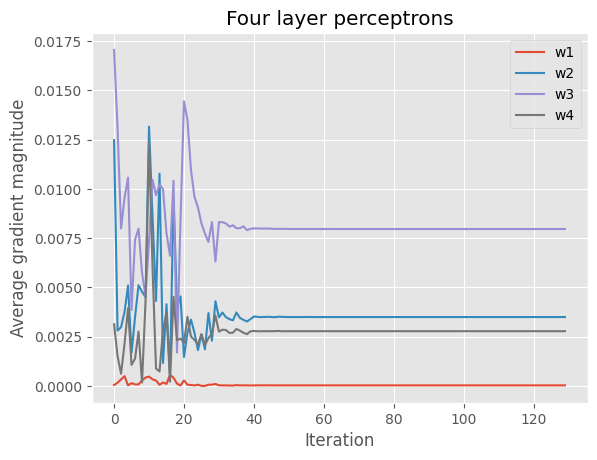

In [311]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_cross_four.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_cross_four.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_cross_four.grad_w3_[10:]), label='w3')
plt.plot(np.abs(nn_cross_four.grad_w4_[10:]), label='w4')
plt.legend()
plt.title('Four layer perceptrons')
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

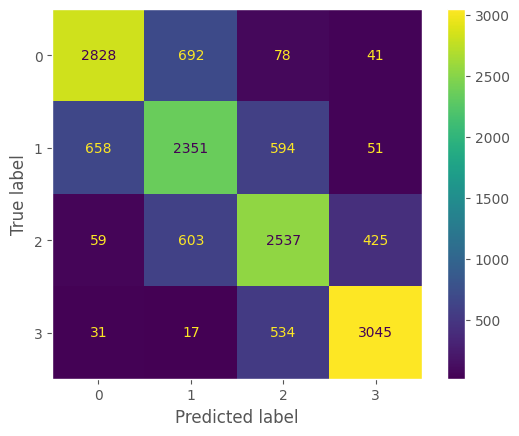

In [312]:
yhat_four = nn_cross_four.predict(X_f_test)
Acc_four=accuracy_score(y_f_test,yhat_four)
cm = confusion_matrix(y_f_test,yhat_four)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

<h4>3.3 Five-layer perceptron</h4>
<p>Adding a fifth layer to the multi-layer perceptron resulted in a resubstitution accuracy of 74.21% and a testing accuracy of 73.85%, showing minimal improvement over the four-layer model. The training loss curve demonstrates rapid convergence within the first 20 epochs, with the loss stabilizing afterward, indicating efficient learning. The testing accuracy plot reflects similar stability, suggesting that the model reached its optimal performance early in training.

The gradient magnitude plot shows that the fourth and fifth layers have the most active learning, with higher gradient magnitudes, while the first layer has minimal gradient activity, contributing less to the learning process. This distribution of gradient activity highlights the role of the deeper layers in capturing complex patterns. The confusion matrix indicates balanced performance across classes, but the marginal gains from the fifth layer suggest that adding further complexity may yield diminishing returns in terms of accuracy improvement..</p>

In [313]:
class FiveLayerPerceptronBase(object):
    def __init__(self, n1_hidden=30,n2_hidden=30,n3_hidden=30,n4_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n1_hidden = n1_hidden
        self.n2_hidden = n2_hidden # Number of hidden in third layer.
        self.n3_hidden = n3_hidden   # Number of hidden in fourth layer.
        self.n4_hidden = n4_hidden   # Number of hidden in fifth layer.
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n1_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n1_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n1_hidden, 1))
        
        W2_num_elems = (self.n1_hidden)*self.n2_hidden
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n2_hidden, self.n1_hidden) # reshape to be W
        b2 = np.zeros((self.n2_hidden, 1))
        
        W3_num_elems = (self.n2_hidden)*self.n3_hidden
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n3_hidden, self.n2_hidden) # reshape to be W
        b3 = np.zeros((self.n3_hidden, 1))

        W4_num_elems = (self.n3_hidden)*self.n4_hidden
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n4_hidden, self.n3_hidden) # reshape to be W
        b4 = np.zeros((self.n4_hidden, 1))
        
        W5_num_elems = (self.n4_hidden)*self.n_output_
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W5.reshape(self.n_output_, self.n4_hidden)
        b5 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2)+np.mean(W3[:, 1:] ** 2)+np.mean(W4[:, 1:] ** 2)+np.mean(W5[:, 1:] ** 2))
    
    def _cost(self, A6, Y_enc, W1, W2, W3, W4, W5):
        '''Get the objective function value'''
        cost = np.mean((Y_enc - A6) ** 2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
        
    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        
        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = -2 * (Y_enc - A6) * A6 * (1 - A6)
        V4 = A5 * (1 - A5) * (W5.T @ V5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1,1))
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C


        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred


In [314]:
class FiLPMiniBatch(FiveLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_W5_prev = np.zeros(self.W5.shape)

        
        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)

        
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []
            mini_grad4 = []
            mini_grad5 = []
            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                    X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5
                )
                
                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(
                    A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5, 
                    Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5
                )
                mini_grad1.append(gradW1)
                mini_grad2.append(gradW2)
                mini_grad3.append(gradW3)
                mini_grad4.append(gradW4)
                mini_grad5.append(gradW5)
                
                # simple momentum calculations
                
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4, eta * gradW5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))

                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4
                self.b5 -= eta * gradb5
                
                # update previous parameters 
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5

            
            self.grad_w1_[i] = np.mean(np.abs(np.mean(mini_grad1[:])))
            self.grad_w2_[i] = np.mean(np.abs(np.mean(mini_grad2[:])))
            self.grad_w3_[i] = np.mean(np.abs(np.mean(mini_grad3[:])))    
            self.grad_w4_[i] = np.mean(np.abs(np.mean(mini_grad4[:])))  
            self.grad_w5_[i] = np.mean(np.abs(np.mean(mini_grad5[:])))

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self


In [315]:
class FiLPMiniBatchCrossEntropy(FiLPMiniBatch):
    def _costt(self, A6, Y_enc, W1, W2, W3, W4, W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num(Y_enc * np.log(A6 + 1e-7) + (1 - Y_enc) * np.log(1 - A6 + 1e-7)))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = (A6 - Y_enc)
        V4 = A5 * (1 - A5) * (W5.T @ V5)
        V3 = A4 * (1 - A4) * (W4.T @ V4)
        V2 = A3 * (1 - A3) * (W3.T @ V3)
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1, 1))
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5

In [316]:
class FiLPBetterInitial(FiLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n1_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n1_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4 * np.sqrt(6. / (self.n2_hidden + self.n1_hidden))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n2_hidden, self.n1_hidden))

        init_bound = 4 * np.sqrt(6. / (self.n3_hidden + self.n2_hidden))
        W3 = np.random.uniform(-init_bound, init_bound, (self.n3_hidden, self.n2_hidden))

        init_bound = 4 * np.sqrt(6. / (self.n4_hidden + self.n3_hidden))
        W4 = np.random.uniform(-init_bound, init_bound, (self.n4_hidden, self.n3_hidden))


        init_bound = 4 * np.sqrt(6. / (self.n_output_ + self.n4_hidden))
        W5 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n4_hidden))

        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n1_hidden, 1))
        b2 = np.zeros((self.n2_hidden, 1))
        b3 = np.zeros((self.n3_hidden, 1))
        b4 = np.zeros((self.n4_hidden, 1))
        b5 = np.zeros((self.n_output_, 1))
        
        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5


In [317]:
vals5 = {'n1_hidden':25, 'n2_hidden':19, 'n3_hidden':14,  'n4_hidden':10, 
         'C':1e-2, 'epochs':120, 'eta':0.01, 'random_state':1,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train_balanced)/256,
         'shuffle':True}

In [318]:
nn_cross_five = FiLPBetterInitial(**vals5)
nn_cross_five.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test))

Epoch: 120/120

Resubstitution acc: 0.7421872314092206
Testing acc: 0.7385863586358636


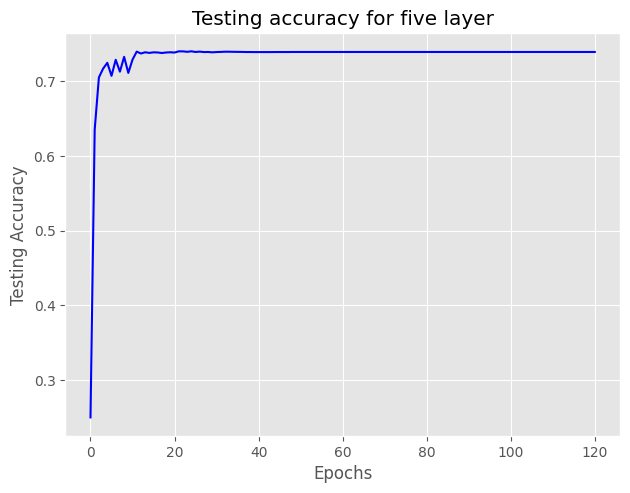

In [319]:
print_result(nn_cross_five,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for five layer')
plt.show()

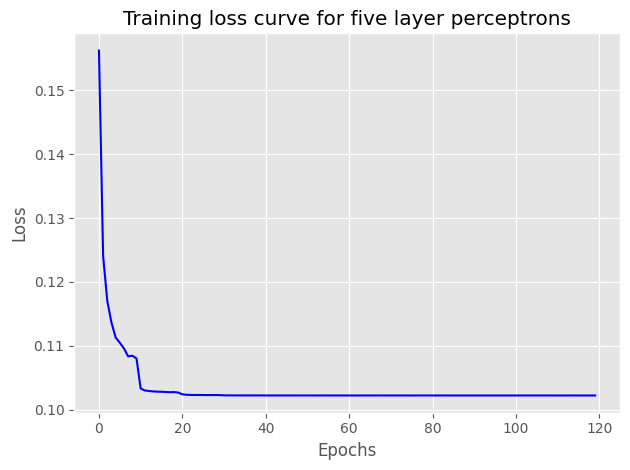

In [320]:
cost_avgs = [np.mean(x) for x in nn_cross_five.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve for five layer perceptrons')
plt.tight_layout()
plt.show()

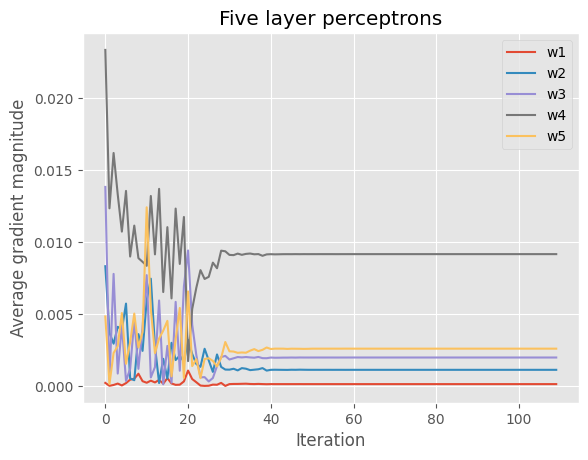

In [321]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_cross_five.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_cross_five.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_cross_five.grad_w3_[10:]), label='w3')
plt.plot(np.abs(nn_cross_five.grad_w4_[10:]), label='w4')
plt.plot(np.abs(nn_cross_five.grad_w5_[10:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.title('Five layer perceptrons')
plt.xlabel('Iteration')
plt.show()

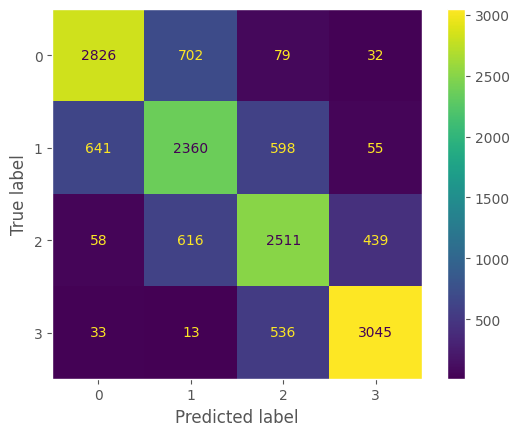

In [322]:
yhat_five = nn_cross_five.predict(X_f_test)
Acc_five=accuracy_score(y_f_test,yhat_five)
cm = confusion_matrix(y_f_test,yhat_five)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

<h4>3.4 Five Layer Perceptron with RMSProp Adaptive Learning Technique</h4>
<p>For the five-layer perceptron, RMSProp was selected as the adaptive learning technique to optimize performance. RMSProp adjusts the learning rate based on a moving average of squared gradients, allowing for more stable and controlled convergence. Compared to the standard fixed learning rate, RMSProp improved the model's performance, achieving a resubstitution accuracy of 74.51% and a testing accuracy of 73.98%, both slightly higher than without RMSProp.

The training loss curve indicates rapid convergence within the first 20 epochs, with the loss remaining stable afterward. The testing accuracy plot shows consistency and early stability, indicating that RMSProp helped the model avoid over-adjusting weights, leading to a more balanced training process. The gradient magnitude plot reveals that the deeper layers maintained active gradient magnitudes, highlighting their significant contribution to learning, while the adaptive technique moderated fluctuations. Overall, RMSProp contributed to improved accuracy and stability, with better classification balance across classes, as observed in the confusion matrix.</p>

In [323]:
class FiLPRMSProp(FiLPBetterInitial):  
    
    def __init__(self, eps=0.0, gamma=0.0, **kwds):        
        # need to add to the original initializer 
        self.eps = eps 
        self.gamma = gamma
        # but keep other keywords
        super().__init__(**kwds) ##
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_W5_prev = np.zeros(self.W5.shape)
        V1_prev = np.zeros(self.W1.shape)
        V2_prev = np.zeros(self.W2.shape)
        V3_prev = np.zeros(self.W3.shape)
        V4_prev = np.zeros(self.W4.shape)
        V5_prev = np.zeros(self.W5.shape)
        
        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)

        
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []
            mini_grad4 = []
            mini_grad5 = []
            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                    X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5
                )
                
                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(
                    A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5, 
                    Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5
                )
                V1 = self.gamma*V1_prev + (1-self.gamma)*gradW1*gradW1
                V2 = self.gamma*V2_prev + (1-self.gamma)*gradW2*gradW2 
                V3 = self.gamma*V3_prev + (1-self.gamma)*gradW3*gradW3
                V4 = self.gamma*V4_prev + (1-self.gamma)*gradW4*gradW4
                V5 = self.gamma*V5_prev + (1-self.gamma)*gradW5*gradW5
                mini_grad1.append(gradW1)
                mini_grad2.append(gradW2)
                mini_grad3.append(gradW3)
                mini_grad4.append(gradW4)
                mini_grad5.append(gradW5)
                
                # simple momentum calculations
                
                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * gradW1/np.sqrt(V1 +self.eps), eta * gradW2/np.sqrt(V2 +self.eps),eta * gradW3/np.sqrt(V3+self.eps),eta * gradW4/np.sqrt(V4+self.eps),eta * gradW5/np.sqrt(V5+self.eps)
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))

                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4
                self.b5 -= eta * gradb5
                
                # update previous parameters 
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5
                V1_prev, V2_prev, V3_prev, V4_prev, V5_prev = V1, V2, V3,V4,V5
            
            self.grad_w1_[i] = np.mean(np.abs(np.mean(mini_grad1[:])))
            self.grad_w2_[i] = np.mean(np.abs(np.mean(mini_grad2[:])))
            self.grad_w3_[i] = np.mean(np.abs(np.mean(mini_grad3[:])))    
            self.grad_w4_[i] = np.mean(np.abs(np.mean(mini_grad4[:])))  
            self.grad_w5_[i] = np.mean(np.abs(np.mean(mini_grad5[:])))

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self


In [324]:
vals_Ap = {'n1_hidden':25, 'n2_hidden':19, 'n3_hidden':14,  'n4_hidden':10, 
         'C':1e-2, 'epochs':120, 'eta':0.01, 'random_state':1, 'decrease_iter':20, 'eps':1e-3, 'gamma':0.9,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train_balanced)/256,
         'shuffle':True}

In [325]:
nn_cross_five_RMSProp = FiLPRMSProp(**vals_Ap)
nn_cross_five_RMSProp.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test))

Epoch: 120/120

Resubstitution acc: 0.7451954481383436
Testing acc: 0.7398927392739274


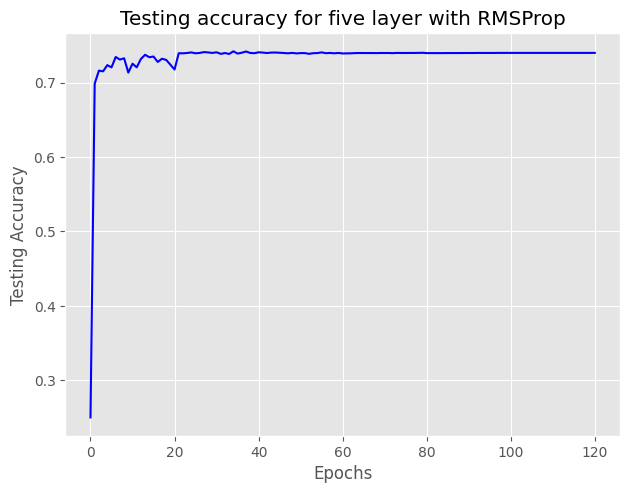

In [326]:
print_result(nn_cross_five_RMSProp,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for five layer with RMSProp')
plt.show()

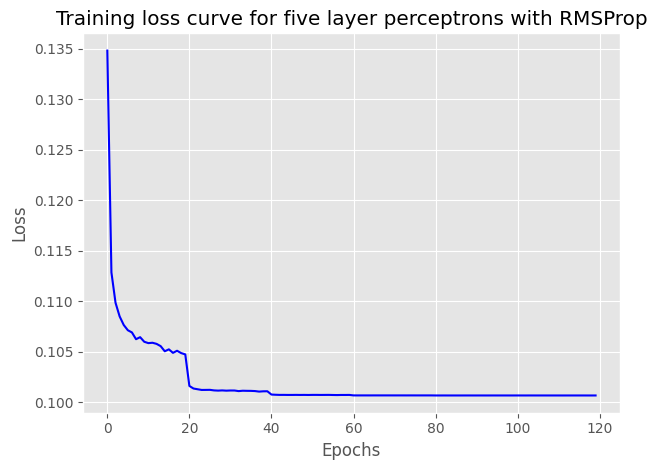

In [327]:
cost_avgs = [np.mean(x) for x in nn_cross_five_RMSProp.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve for five layer perceptrons with RMSProp')

plt.tight_layout()
plt.show()

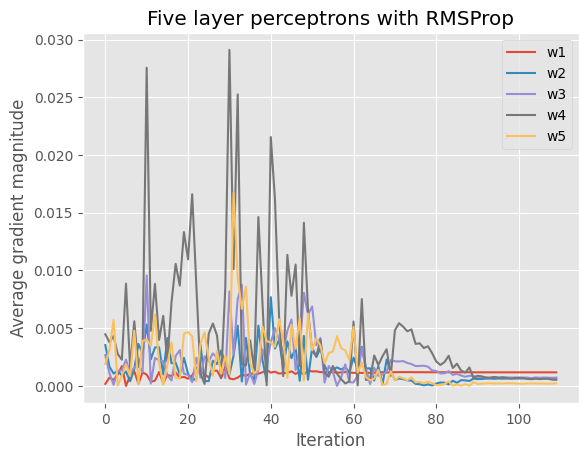

In [328]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_cross_five_RMSProp.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_cross_five_RMSProp.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_cross_five_RMSProp.grad_w3_[10:]), label='w3')
plt.plot(np.abs(nn_cross_five_RMSProp.grad_w4_[10:]), label='w4')
plt.plot(np.abs(nn_cross_five_RMSProp.grad_w5_[10:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.title('Five layer perceptrons with RMSProp')
plt.xlabel('Iteration')
plt.show()

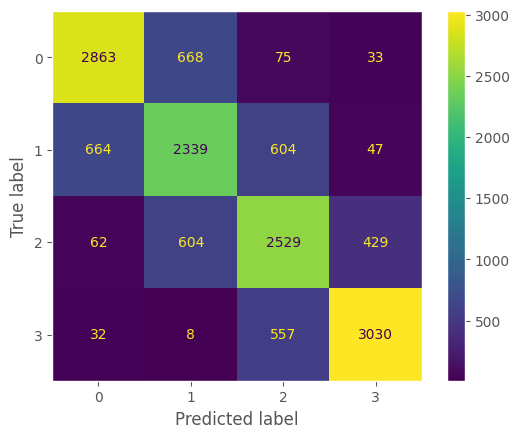

In [329]:
yhat_five_RMSProp = nn_cross_five_RMSProp.predict(X_f_test)
Acc_five_RMSProp=accuracy_score(y_f_test,yhat_five_RMSProp)
cm = confusion_matrix(y_f_test,yhat_five_RMSProp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

<h4>3.5 Comparison of Five Layer Perceptron with and without RMSProp</h4>
<p>A statistical comparison was conducted to evaluate the performance difference between the five-layer perceptron model with and without RMSProp using a 95% confidence interval. The chi-square test yielded a chi² statistic of 0.49703161673339774 and a p-value of 0.4808073158137357. These results indicate that there is no statistically significant difference in the error proportions between the two models, as we fail to reject the null hypothesis. The models show very similar accuracy rates, with the model using RMSProp achieving 73.98%  accuracy, compared to 73.85% for the model without RMSProp. This suggests that while RMSProp provided a slight improvement in accuracy, the difference is not substantial enough to conclude that it significantly affects model performance in this case.
</p>

In [330]:
print('The comparison between FLP "without RMSProp" and "with RMSProp" with 95% confidence interval is as follows:')
table = mcnemar_table(y_target=y_test, y_model1=yhat_five, y_model2=yhat_five_RMSProp)
chi2_, p = mcnemar(ary=table1, corrected=True)
print(table)
print(f"chi² statistic: {chi2_}, p-value: {p}")
if p > 0.05:
    print("Same proportions of errors (fail to reject Null Hypothesis--There isn't enough evidence to suggest that the Five Layer Perceptron models with and without RMSProp are different from each other)")
else:
        print('Different proportions of errors (reject H0)')


The comparison between FLP "without RMSProp" and "with RMSProp" with 95% confidence interval is as follows:
[[10326   416]
 [  435  3367]]
chi² statistic: 0.49703161673339774, p-value: 0.4808073158137357
Same proportions of errors (fail to reject Null Hypothesis--There isn't enough evidence to suggest that the Five Layer Perceptron models with and without RMSProp are different from each other)


In [331]:
print('----------------------------------------------------------------')
print(f'                   With RMSProp              Without RMSProp')
print('----------------------------------------------------------------')
print(f' Accuracy        {Acc_five_RMSProp}          {Acc_five}')
print('----------------------------------------------------------------')

----------------------------------------------------------------
                   With RMSProp              Without RMSProp
----------------------------------------------------------------
 Accuracy        0.7398927392739274          0.7385863586358636
----------------------------------------------------------------


<h2>4. Exceptional work</h2>
<h4>4.1 Five Layer Perceptron with AdaM Adaptive Learning Technique</h4>
<p>In this analysis, the Adam optimization technique was implemented on a five-layer perceptron model to observe its effects on performance and convergence. Adam, known for its adaptive learning rate and momentum, resulted in a steady and smooth improvement in accuracy, converging quickly to around 74.36% testing accuracy and 74.20% resubstitution accuracy after approximately 250 epochs. The training loss decreased consistently, indicating stable and effective learning.

The comparison of gradient magnitudes across layers shows that Adam maintains relatively low gradients, which suggests controlled updates that prevent extreme fluctuations and overfitting. This stability in the gradient values demonstrates Adam's ability to dynamically adjust the learning rate per parameter, making it particularly useful for deep networks. The confusion matrix indicates balanced class prediction, with improvements across most categories compared to previous optimization methods. These results show that Adam provides a balanced and efficient approach to training, resulting in marginal but steady improvements in overall model performance for this multi-layer neural network.</p>

In [332]:
class FiLPAdam(FiLPBetterInitial):
    def __init__(self, eps=0.0, beta1=0.0, beta2=0.0,**kwds):        
        # need to add to the original initializer 
        self.eps = eps 
        self.beta1 = beta1
        self.beta2 = beta2
        # but keep other keywords
        super().__init__(**kwds) ##

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()
        
        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
        beta1 = 0.9
        beta2 = 0.999
        # eta is defined as self.eta passed as a parameter 
        epsilon = 1e-8
        
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)
                                
        M1_prev = np.zeros(self.W1.shape)
        M2_prev = np.zeros(self.W2.shape)
        M3_prev = np.zeros(self.W3.shape)
        M4_prev = np.zeros(self.W4.shape)
        M5_prev = np.zeros(self.W5.shape)
        
        V1_prev = np.zeros(self.W1.shape)
        V2_prev = np.zeros(self.W2.shape)
        V3_prev = np.zeros(self.W3.shape)
        V4_prev = np.zeros(self.W4.shape)
        V5_prev = np.zeros(self.W5.shape)
        
        k=0
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            k += 1
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            
            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []
            mini_grad4 = []
            mini_grad5 = []
            
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                    X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5
                )
                
                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(
                    A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5, 
                    Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5
                )
                mini_grad1.append(gradW1)
                mini_grad2.append(gradW2)
                mini_grad3.append(gradW3)
                mini_grad4.append(gradW4)
                mini_grad5.append(gradW5)

                M1 = self.beta1*M1_prev + (1-self.beta1)*gradW1
                M2 = self.beta1*M2_prev + (1-self.beta1)*gradW2
                M3 = self.beta1*M3_prev + (1-self.beta1)*gradW3
                M4 = self.beta1*M4_prev + (1-self.beta1)*gradW4
                M5 = self.beta1*M5_prev + (1-self.beta1)*gradW5
                
                V1 = self.beta2*V1_prev + (1-self.beta2)*gradW1*gradW1
                V2 = self.beta2*V2_prev + (1-self.beta2)*gradW2*gradW2
                V3 = self.beta2*V3_prev + (1-self.beta2)*gradW3*gradW3
                V4 = self.beta2*V4_prev + (1-self.beta2)*gradW4*gradW4
                V5 = self.beta2*V5_prev + (1-self.beta2)*gradW5*gradW5

                M1_hat = M1/(1-(self.beta1)**(k))
                M2_hat = M2/(1-(self.beta1)**(k))
                M3_hat = M3/(1-(self.beta1)**(k))
                M4_hat = M4/(1-(self.beta1)**(k))
                M5_hat = M5/(1-(self.beta1)**(k))
                
       
                V1_hat = V1/(1-(self.beta2)**(k))
                V2_hat = V2/(1-(self.beta2)**(k))
                V3_hat = V3/(1-(self.beta2)**(k))
                V4_hat = V4/(1-(self.beta2)**(k))
                V5_hat = V5/(1-(self.beta2)**(k))
                
                self.W1 -= self.eta *(np.true_divide(M1_hat,(np.sqrt(V1_hat)+self.eps)))
                self.W2 -= self.eta *(np.true_divide(M2_hat,(np.sqrt(V2_hat)+self.eps)))
                self.W3 -= self.eta *(np.true_divide(M3_hat,(np.sqrt(V3_hat)+self.eps)))
                self.W4 -= self.eta *(np.true_divide(M4_hat,(np.sqrt(V4_hat)+self.eps)))
                self.W5 -= self.eta *(np.true_divide(M5_hat,(np.sqrt(V5_hat)+self.eps)))

                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4
                self.b5 -= eta * gradb5
                
                # update previous parameters 
                M1_prev, M2_prev, M3_prev, M4_prev, M5_prev = M1, M2, M3, M4, M5
                V1_prev, V2_prev, V3_prev, V4_prev, V5_prev = V1, V2, V3, V4, V5
            
            self.grad_w1_[i] = np.mean(np.abs(np.mean(mini_grad1[:])))
            self.grad_w2_[i] = np.mean(np.abs(np.mean(mini_grad2[:])))
            self.grad_w3_[i] = np.mean(np.abs(np.mean(mini_grad3[:])))    
            self.grad_w4_[i] = np.mean(np.abs(np.mean(mini_grad4[:])))  
            self.grad_w5_[i] = np.mean(np.abs(np.mean(mini_grad5[:])))

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self


In [333]:
vals_Adam = {'n1_hidden':25, 'n2_hidden':19, 'n3_hidden':14,  'n4_hidden':10, 'beta1':0.9,'beta2':0.999,
         'C':1e-2, 'epochs':250, 'eta':0.001, 'random_state':3000, 'decrease_iter':20,'eps':1e-8,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train_balanced)/256,
         'shuffle':True}

In [334]:
nn_cross_five_Adam = FiLPAdam(**vals_Adam)
nn_cross_five_Adam.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));

Epoch: 250/250

Resubstitution acc: 0.7436311754391997
Testing acc: 0.742024202420242


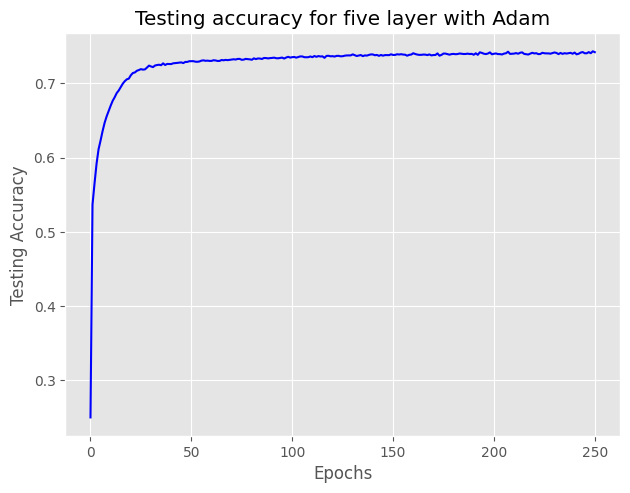

In [335]:
print_result(nn_cross_five_Adam,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for five layer with Adam')
plt.show()

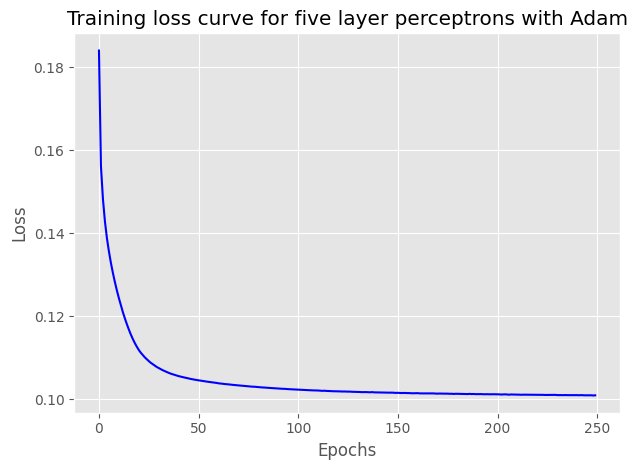

In [336]:
cost_avgs = [np.mean(x) for x in nn_cross_five_Adam.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve for five layer perceptrons with Adam')
plt.tight_layout()
plt.show()

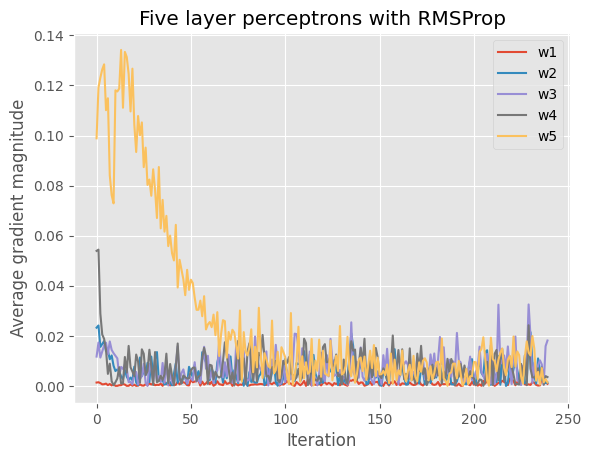

In [337]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_cross_five_Adam.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_cross_five_Adam.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_cross_five_Adam.grad_w3_[10:]), label='w3')
plt.plot(np.abs(nn_cross_five_Adam.grad_w4_[10:]), label='w4')
plt.plot(np.abs(nn_cross_five_Adam.grad_w5_[10:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title('Five layer perceptrons with RMSProp')
plt.show()

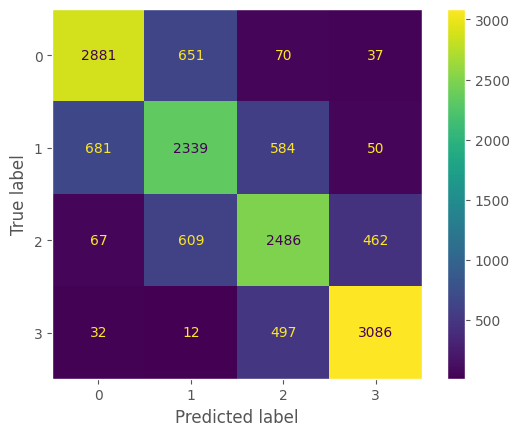

In [338]:
yhat_five_Adam = nn_cross_five_Adam.predict(X_f_test)
Acc_five_Adam =accuracy_score(y_f_test,yhat_five_Adam)
cm = confusion_matrix(y_f_test,yhat_five_Adam)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

<h4>4.2 Statistical Comparison between RMSProp and AdaM Adaptive Learning Techniques</h4>

In [339]:
print('The comparison between FLP  "RMSProp" and "Adam" with 95% confidence interval is as follows:')
table = mcnemar_table(y_target=y_test, y_model1=yhat_five_RMSProp, y_model2=yhat_five_Adam)
chi2_, p = mcnemar(ary=table1, corrected=True)
print(table)
print(f"chi² statistic: {chi2_}, p-value: {p}")
if p > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that the Five Layer Perceptron models with RMSProp and AdaM Adaptive Learning Techniques are different from each other)")
else:
        print('Different proportions of errors (reject H0)')

The comparison between FLP  "RMSProp" and "Adam" with 95% confidence interval is as follows:
[[10350   411]
 [  442  3341]]
chi² statistic: 0.49703161673339774, p-value: 0.4808073158137357
Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that the Five Layer Perceptron models with RMSProp and AdaM Adaptive Learning Techniques are different from each other)


In [340]:
print('----------------------------------------------------------------')
print(f'                   With RMSProp             With Adam')
print('----------------------------------------------------------------')
print(f' Accuracy        {Acc_five_RMSProp}          {Acc_five_Adam}')
print('----------------------------------------------------------------')

----------------------------------------------------------------
                   With RMSProp             With Adam
----------------------------------------------------------------
 Accuracy        0.7398927392739274          0.742024202420242
----------------------------------------------------------------


<p>The statistical comparison between the Five Layer Perceptron (FLP) models trained with RMSProp and Adam optimization techniques shows no significant difference in performance, based on a chi-squared test at a 95% confidence level. The chi-squared statistic is 0.49703161673339774 with a p-value of 0.4808073158137357, indicating that we fail to reject the null hypothesis. This suggests there is insufficient evidence to conclude that the error proportions are different between the two adaptive learning techniques. In terms of accuracy, the model with RMSProp achieved 73.98%, while the model with Adam reached 74.20%. Despite Adam showing a slightly higher accuracy, the difference is minimal and not statistically significant. This result implies that both RMSProp and Adam provide comparable performance for this five-layer neural network model, with no clear advantage of one adaptive learning technique over the other in this context.</p>

<h4>References</h4>
<ul>
    <li>Python Machine Learning Book (GitHub Repository): <a href="https://github.com/rasbt/python-machine-learning-book/tree/17e037bec5c6beb509d0e77d63ea537ef3a0a281" target="_blank">https://github.com/rasbt/python-machine-learning-book/tree/17e037bec5c6beb509d0e77d63ea537ef3a0a281</a></li>
    <li>Machine Learning Notebooks by eclarson (GitHub Repository): <a href="https://github.com/eclarson/MachineLearningNotebooks" target="_blank">https://github.com/eclarson/MachineLearningNotebooks</a></li>
    <li>OpenAI GPT Model: <a href="https://chatgpt.com/" target="_blank">https://chatgpt.com/</a></li>
    <li>US Census Demographic Data (Kaggle Dataset): <a href="https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data/data" target="_blank">https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data/data</a></li>
</ul>
